# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/AlastairWong/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


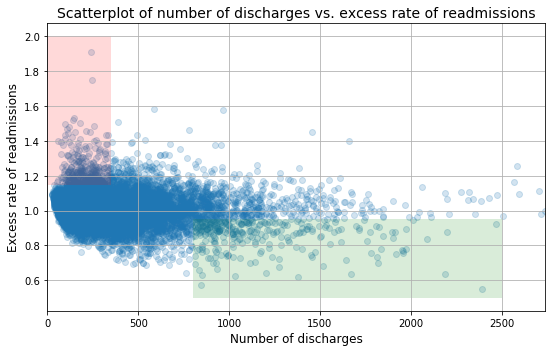

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [21]:
# Your turn
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


A. Do you agree with the above analysis and recommendations? Why or why not?

In [70]:
# Calculating slope of the scatterplot line of best fit
slope, intercept = np.polyfit(x, y, 1)
print("General slope in the above graph: ", slope)

# Calculating Pearson r for the scatterplot
pearson_r = np.corrcoef(x, y)[0, 1]
print("Pearson r : ", pearson_r)

General slope in the above graph:  -2.85650529438e-05
Pearson r :  -0.0930955428759


I disagree with statement A. Regarding the initial observations based on the plot above, although there seems to be a very mild downward slope between number of discharges and excess rate of readmissions, the pearson r coefficient indicates that this is a very weak correlation. Therefore, the initial observations above is not statistically significant.

In [7]:
# Validating the average Excessive Readmission Ratio for Number of Discharges < 100 and > 1000.
df = clean_hospital_read_df.iloc[81:-3]
Nod_100 = df[df['Number of Discharges'] < 100]
ERR_100_mean = Nod_100.mean()['Excess Readmission Ratio']
print("Excess readmission ratio for number of discharge < 100 is: {:.3f}".format(ERR_100_mean))
Nod_1000 = df[df['Number of Discharges'] > 1000]
ERR_1000_mean = Nod_1000.mean()['Excess Readmission Ratio']
print("Excess readmission ratio for number of discharge > 1000 is: {:.3f}".format(ERR_1000_mean))

Excess readmission ratio for number of discharge < 100 is: 1.023
Excess readmission ratio for number of discharge > 1000 is: 0.979


In [71]:
# Validating the % of Excessive Readmission Ratio > 1 for Number of Discharges < 100 and > 1000
ERR_100_g1 = np.sum(Nod_100['Excess Readmission Ratio'] > 1)/len(Nod_100)*100
print("% of excess readmission ratio greater than 1 for number of discharge < 100 is: {:.0f}".format(ERR_100_g1), "%")
ERR_1000_g1 = np.sum(Nod_1000['Excess Readmission Ratio'] > 1)/len(Nod_1000)*100
print("% of excess readmission ratio greater than 1 for number of discharge > 1000 is: {:.0f}".format(ERR_1000_g1), "%")

% of excess readmission ratio greater than 1 for number of discharge < 100 is: 63 %
% of excess readmission ratio greater than 1 for number of discharge > 1000 is: 45 %


I agree with statement B; the results I've obtained are fairly similar to the statistics calculated above.

With regards to statement C, although a drop in both the readmission ratio and the % of excess readmission ratio greater than 1 with number of discharge > 1000, further statistical tests are required in order to confirm this.

Null hypothesis: the number of discharge < 100 vs. > 1000 have the same mean excess readmission ratio.

Confidence required: 99%

In [72]:
# Working out the empirical differences in mean ERR and % ERR > 1
Emp_ERR_diff = ERR_100_mean - ERR_1000_mean
Emp_ERR_g1_diff = ERR_100_g1 - ERR_1000_g1

In [73]:
# Selecting the Excessive Readmission Ratio columns after filtering for NoD < 100 and NoD > 1000
ERR_100 = Nod_100['Excess Readmission Ratio']
ERR_1000 = Nod_1000['Excess Readmission Ratio']

In [34]:
# Defining functions for generating permutation replicates, calculating difference of means of two data sets, and 
# calculating difference of % ERR > 1 for two data sets
def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        data = np.concatenate((data1, data2))
        permuted_data = np.random.permutation(data)
        perm_sample1 = permuted_data[:len(data1)]
        perm_sample2 = permuted_data[len(data1):]
        perm_replicates[i] = func(perm_sample1, perm_sample2)
    return perm_replicates

def diff_of_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

def diff_of_g1_perc(data1, data2):
    return np.sum(data1 > 1)/len(data1)*100 - np.sum(data2 > 1)/len(data2)*100

p-value: 0.000000


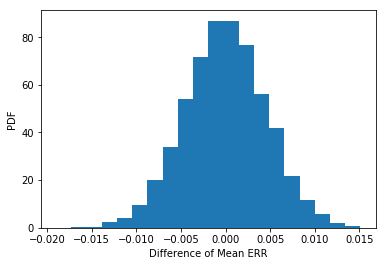

In [74]:
# Calculating p-value for the above null hypothesis
perm_rep = draw_perm_reps(ERR_100, ERR_1000, diff_of_means, 10000)
p_value = np.sum(perm_rep > Emp_ERR_diff)/len(perm_rep)
print("p-value: {:.6f}".format(p_value))
plt.hist(perm_rep, normed=True, bins=20)
plt.xlabel("Difference of Mean ERR")
plt.ylabel("PDF")
plt.show()

Null hypothesis: the number of discharge < 100 vs. > 1000 have the same % of ERR > 1.

Confidence required: 99%

p-value: 0.000000


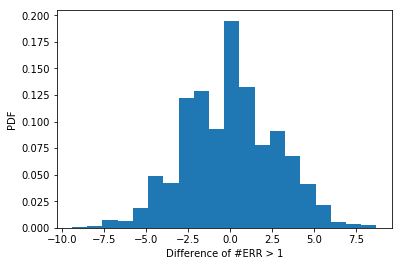

In [75]:
# Calculating p-value for the above null hypothesis
perm_rep2 = draw_perm_reps(ERR_100, ERR_1000, diff_of_g1_perc, 10000)
p_value_2 = np.sum(perm_rep2 > Emp_ERR_g1_diff)/len(perm_rep2)
print("p-value: {:.6f}".format(p_value_2))
plt.hist(perm_rep2, normed=True, bins=20)
plt.xlabel("Difference of #ERR > 1")
plt.ylabel("PDF")
plt.show()

Hence, since p-value = 0, it has been shown above that higher number of discharge is associated with lower number of readmission rate. Therefore, statistically speaking, I agree with statement C. However, this is an example which highlights the difference between statistical significance and practical significance. Although statistically speaking higher hospital capacity may lower the readmission rate, the mild downward slope and the lack of strong correlation seem to suggest that the number of discharge isn't a main driving factor for readmission rate. Given the noisiness of the data, it seems to suggest that there are other variables at play which more strongly impact the readmission rate. On the other hand, increasing the capacities of hospitals would have capital cost implications. At a practical level, it is only worth pursuing if the monetary benefit outweights the costs associated. Given the low level of impact the number of discharge has on readmission rate, I would not advise my client to increase capacities of hospitals.

With the scatter plot above, there are advantages and disadvantages.

Advantages:
- Easy to plot
- Can be easy to spot trends

Disadvantages:
- For large datasets, scatter plots look cluttered
- Trends can be deceiving for large datasets
- For communication purposes, message can be less clear

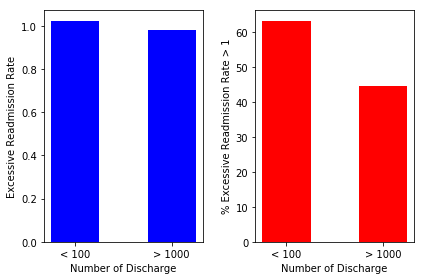

In [76]:
# Plotting two bar charts to more directly convey the message
plt.subplot(1, 2, 1)
N = 2
ind = np.arange(N)
width = 0.5
plt.bar(ind, (ERR_100_mean, ERR_1000_mean), width, color='blue')
plt.xlabel("Number of Discharge")
plt.ylabel("Excessive Readmission Rate")
plt.xticks(ind, ('< 100', '> 1000'))
plt.subplot(1, 2, 2)
plt.bar(ind, (ERR_100_g1, ERR_1000_g1), width, color='red')
plt.xlabel("Number of Discharge")
plt.ylabel("% Excessive Readmission Rate > 1")
plt.xticks(ind, ('< 100', '> 1000'))
plt.tight_layout(w_pad=1.5)
plt.show()